In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target

In [3]:
print("Dataset Shape:", X.shape)
print("Target Classes:", iris.target_names)
print("Target Distribution:")
print(y.value_counts())

Dataset Shape: (150, 4)
Target Classes: ['setosa' 'versicolor' 'virginica']
Target Distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [6]:
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [7]:
wrong = results[results['Actual'] != results['Predicted']]
correct = results[results['Actual'] == results['Predicted']]

In [8]:
print("\nModel Accuracy:", f"{accuracy_score(y_test, y_pred):.4f}")

print("\nWrong Predictions: ")
if len(wrong) > 0:
    print(wrong)
else:
    print("No wrong predictions!")
    

print("\nCorrect predictions: ")
print(correct.head())


Model Accuracy: 0.9111

Wrong Predictions: 
     Actual  Predicted
133       2          1
138       2          1
134       2          1
106       2          1

Correct predictions: 
     Actual  Predicted
107       2          2
63        1          1
56        1          1
127       2          2
140       2          2


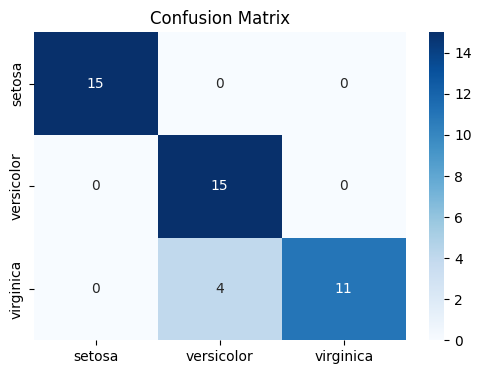

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.show()